NB: This code can only be used if you have the required dataset, which is not public.
Thus, the original dataset is not included.

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import pymc as pm
import numpy as np

import arviz as az
# NB: user needs to install xlrd

In [23]:
verbs_dataset = pd.read_excel("verbs_dataset.xls") # needs the original dataset to go on

In [24]:
verbs_dataset.shape

(3125, 54)

In [25]:
verbs_dataset.head()

,id,book,info_refer,info_reads,info_means,texttype,syn_vbinit,syn_gcb4vb,syn_realis,syn_affneg,...,soc_north,gc2,book2,vb_aspect,obj_def2,gc_samesame2,gc_parsame2,verse,gc3binary,unique
0,1.0,genesis,Gen 01:09,?el ma:qom exad,to one place,narrative,verb first,GC not before vb,irrealis,affirm,...,not yet,prep or prep plus prep,genesis,imperfective,NaN,NaN,NaN,prose,1,unique or representative
1,2.0,genesis,Gen 02:19,?el ha?adam,to the man,narrative,verb first,GC not before vb,realis,affirm,...,not yet,prep or prep plus prep,genesis,perfective,not explicit,NaN,NaN,prose,1,unique or representative
2,3.0,genesis,Gen 02:22,?el ha?adam,to the man,narrative,verb first,GC not before vb,realis,affirm,...,not yet,prep or prep plus prep,genesis,perfective,pronoun,NaN,NaN,prose,1,unique or representative
3,4.0,genesis,Gen 04:03,le-YHWH,to YHWH,narrative,verb first,GC not before vb,realis,affirm,...,not yet,prep or prep plus prep,genesis,perfective,indef NP,NaN,NaN,prose,1,unique or representative
4,5.0,genesis,Gen 06:18,?el hate:bah,to the ark,n/sp,verb first,GC not before vb,irrealis,affirm,...,not yet,prep or prep plus prep,genesis,imperfective,NaN,NaN,NaN,prose,1,unique or representative


In [26]:
verbs_dataset.columns

Index(['id', 'book', 'info_refer', 'info_reads', 'info_means', 'texttype',
       'syn_vbinit', 'syn_gcb4vb', 'syn_realis', 'syn_affneg', 'sub_explicit',
       'sub_anim', 'sub_def', 'sub_num', 'obj_reflexive', 'obj_anim',
       'obj_def', 'obj_num', 'info_verbroot', 'verbid', 'construction',
       'sub_affected', 'sub_affect2', 'vb_binyan', 'vb_passive', 'vb_particip',
       'vb_parse', 'gc_sgpl', 'gc_sameclseq', 'gc_samesame', 'gc_parclseq',
       'gc_parsame', 'info_gcorder', 'gc', 'gc_end', 'gc_def', 'gc_add',
       'gc_proper', 'gc_anim', 'gc_complex', 'gc_prep', 'source', 'era',
       'soc_oral', 'soc_north', 'gc2', 'book2', 'vb_aspect', 'obj_def2',
       'gc_samesame2', 'gc_parsame2', 'verse', 'gc3binary', 'unique'],
      dtype='object')

In [27]:
verbs_dataset.gc.value_counts()

gc
prep                2088
hey                  495
acc of direction     493
prep and prep         39
prep and hey          10
Name: count, dtype: int64

In [28]:
verbs_dataset.gc_prep.value_counts()

gc_prep
?el        1576
no prep     990
l           282
al          103
ad           94
b            75
?et           5
Name: count, dtype: int64

In [29]:
verbs_dataset.obj_anim.value_counts()

obj_anim
animate/extended animate    601
inanimate                   309
impersonal                   78
Name: count, dtype: int64

In [103]:
gc_obj_anim = verbs_dataset[(verbs_dataset.gc.isin(["prep", "hey"]))]
gc_obj_anim.gc.value_counts()

gc
prep    2088
hey      495
Name: count, dtype: int64

In [104]:
gc_obj_anim2 = gc_obj_anim[(gc_obj_anim.obj_anim.isin(["animate/extended animate", "inanimate"]))]
gc_obj_anim2.obj_anim.value_counts()

obj_anim
animate/extended animate    531
inanimate                   261
Name: count, dtype: int64

In [106]:
gc_obj_anim2.shape

(792, 54)

In [107]:
gc_obj_anim2.gc.value_counts()

gc
prep    666
hey     126
Name: count, dtype: int64

In [108]:
gc_obj_anim2.obj_anim.value_counts()

obj_anim
animate/extended animate    531
inanimate                   261
Name: count, dtype: int64

In [109]:
gc_obj_anim2.gc = gc_obj_anim2.gc.astype('category')
gc_obj_anim2.obj_anim = gc_obj_anim2.obj_anim.astype('category')

C:\Users\zht702\AppData\Local\Temp\ipykernel_14488\2048802569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gc_obj_anim2.gc = gc_obj_anim2.gc.astype('category')
C:\Users\zht702\AppData\Local\Temp\ipykernel_14488\2048802569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gc_obj_anim2.obj_anim = gc_obj_anim2.obj_anim.astype('category')


In [101]:
gc_obj_anim2['gc_num'] = np.where(gc_obj_anim2.gc=='prep', 0, 1) 

C:\Users\zht702\AppData\Local\Temp\ipykernel_14488\2916761095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gc_obj_anim2['gc_num'] = np.where(gc_obj_anim2.gc=='prep', 0, 1)


In [102]:
pd.crosstab(gc_obj_anim2.gc, gc_obj_anim2.gc_num)

gc_num,0,1
gc,,
hey,0,126
prep,666,0


In [81]:
gc_obj_anim2['anim_num'] = np.where(gc_obj_anim2.obj_anim=='animate/extended animate', 0, 1) 

C:\Users\zht702\AppData\Local\Temp\ipykernel_14488\1601122754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gc_obj_anim2['anim_num'] = np.where(gc_obj_anim2.obj_anim=='animate/extended animate', 0, 1)


In [95]:
pd.crosstab(gc_obj_anim2.obj_anim, gc_obj_anim2.anim_num)

anim_num,0,1
obj_anim,,
animate/extended animate,531,0
inanimate,0,261


In [96]:
pd.crosstab(gc_obj_anim2.anim_num, gc_obj_anim2.gc_num)

gc_num,0,1
anim_num,,
0,440,91
1,226,35


In [82]:
gc_obj_anim2.gc_num.value_counts()

gc_num
0    666
1    126
Name: count, dtype: int64

In [83]:
gc_obj_anim2.anim_num.value_counts()

anim_num
0    531
1    261
Name: count, dtype: int64

In [84]:
basic_model = pm.Model()

def logistic(l):
    return 1 / (1 + np.exp(-l))

with basic_model:
    Y = pm.Data('Y', gc_obj_anim2.gc_num.values)
    X = pm.Data('X', gc_obj_anim2.anim_num.values)
    
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1)

    # Expected value of outcome
    mu = alpha + beta*X

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Bernoulli('Y_obs', p=logistic(mu), observed=Y)
    
    # Start sampling
    idata = pm.sample()

C:\Users\zht702\Anaconda3\envs\pymc_env\Lib\site-packages\pymc\data.py:428: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


In [85]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.566,0.112,-1.774,-1.353,0.002,0.002,2276.0,2164.0,1.0
beta,-0.297,0.208,-0.704,0.077,0.004,0.003,2309.0,2483.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

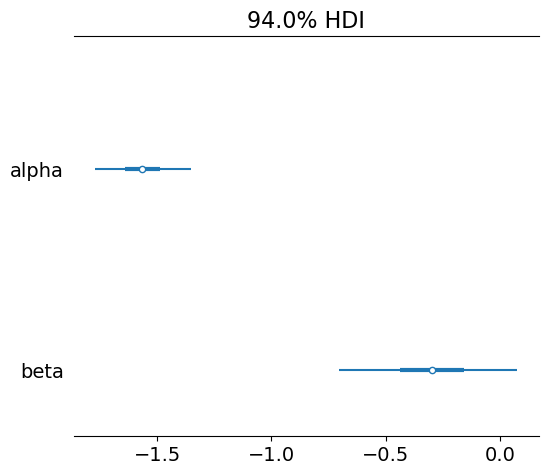

In [86]:
az.plot_forest(idata, var_names=['alpha', 'beta'], combined=True)

In [87]:
np.exp(-1.566)/(1+np.exp(-1.566))

0.17278737122805557

In [ ]:
# the probability that the output (gc) is equal to 0 when all the input variables (animacy) is equal to 0

In [88]:
np.exp(-1.58-0.297)/(1+np.exp(-1.58-0.297))

0.13273383990287108

In [98]:
pd.crosstab(gc_obj_anim2.anim_num, gc_obj_anim2.gc_num)

gc_num,0,1
anim_num,,
0,440,91
1,226,35


In [99]:
pd.crosstab(verbs_dataset.gc_anim, verbs_dataset.gc)

gc,acc of direction,hey,prep,prep and hey,prep and prep
gc_anim,,,,,
animate,6,0,916,0,1
inanimate,487,495,1172,10,38


In [91]:
91/(91+440)

0.1713747645951036

In [92]:
35/ (35+226)

0.13409961685823754